In [34]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
dialogues = pd.read_csv("../data/dialouges_over_time.csv")
characters = pd.read_csv("../data/characters_w_map.csv")
end_sentiment = pd.read_csv("../data/end_sentiment.csv")



In [4]:
# Count the number of lines for each character
line_counts = dialogues['mapped'].value_counts()

# Get the top 20 characters with the most lines
top_20_characters = line_counts.head(20).reset_index()

# Rename columns for clarity
top_20_characters.columns = ['character', 'line_count']

In [27]:
# find end sentiment for top 20 characters
top20_final_sentiment = end_sentiment.loc[end_sentiment['speaker'].isin(top_20_characters['character'])]

# top 3
top3_final_sentiment = top20_final_sentiment.sort_values(by='final_average_sentiment', ascending=False).head(3)

# bottom 3  
bottom3_final_sentiment = top20_final_sentiment.sort_values(by='final_average_sentiment', ascending=True).head(3)



In [28]:
top3_final_sentiment

,speaker,final_accumulative_sentiment,final_average_sentiment
217,margaery,232.034402,0.192857
43,cersei lannister,13.017529,0.096774
235,ramsay,104.451694,0.096296


In [29]:
bottom3_final_sentiment

,speaker,final_accumulative_sentiment,final_average_sentiment
63,arya stark,-99.303193,-0.346939
57,jaime lannister,-60.948613,-0.343750
54,tywin lannister,-34.176403,-0.333333


In [46]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hrobjarturh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
from nltk.corpus import stopwords

# Example: English stopwords
stop_words = stopwords.words('english')
print(stop_words[:10])  # Display first 10 stopwords


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [48]:
def create_wordcloud(speaker, sentiment):
    speaker_dialogues = dialogues.loc[dialogues['mapped']==speaker]

    # create a word cloud for the speaker
    # join all texts into a single string since generate() expects a string
    text = ' '.join(speaker_dialogues['Text'].tolist())
    # remove stop words
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.title(f"{speaker} - {len(speaker_dialogues)} lines of dialogue - {sentiment:.2f}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



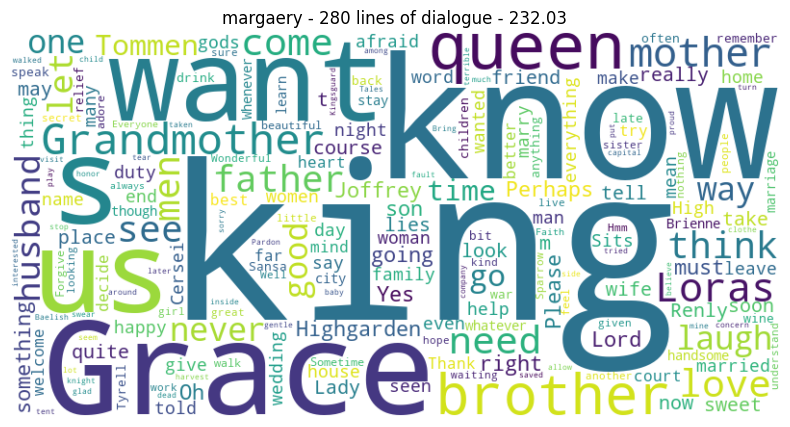

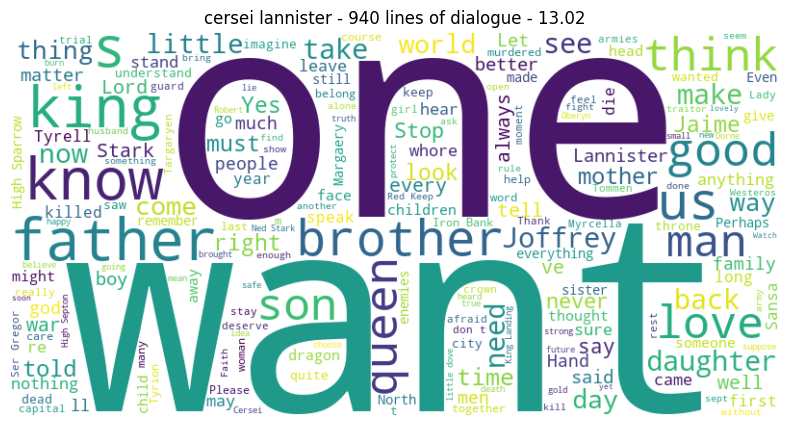

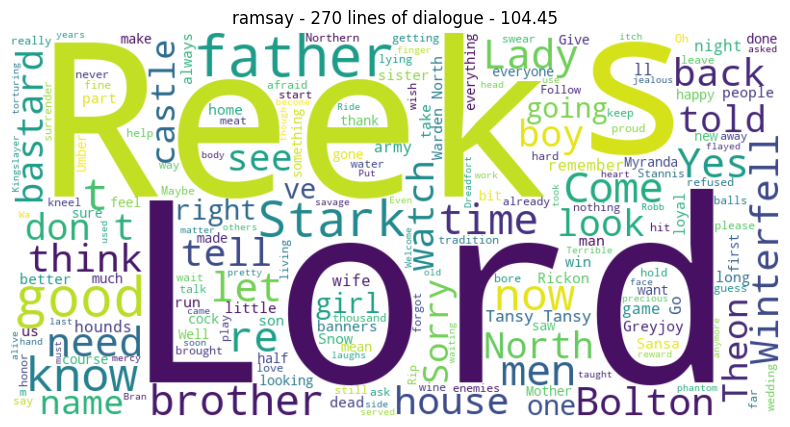

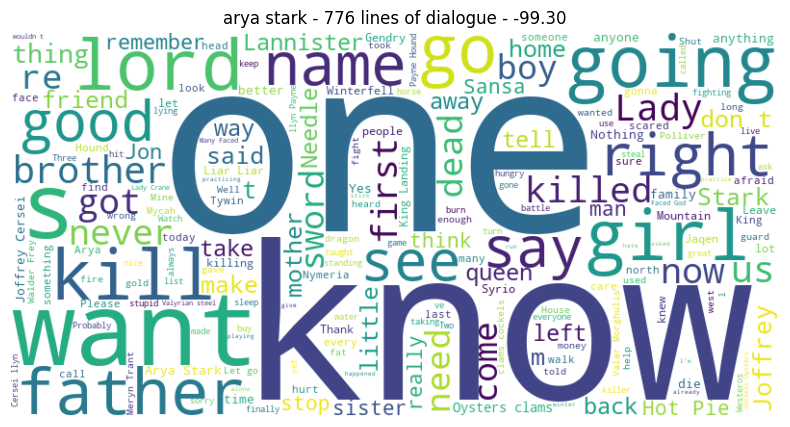

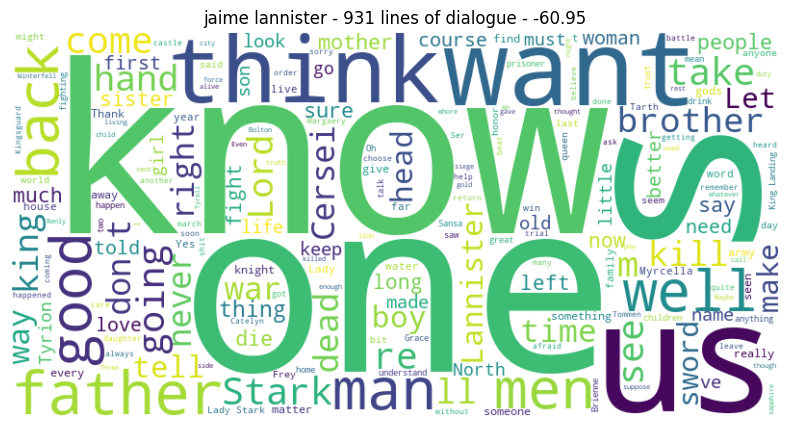

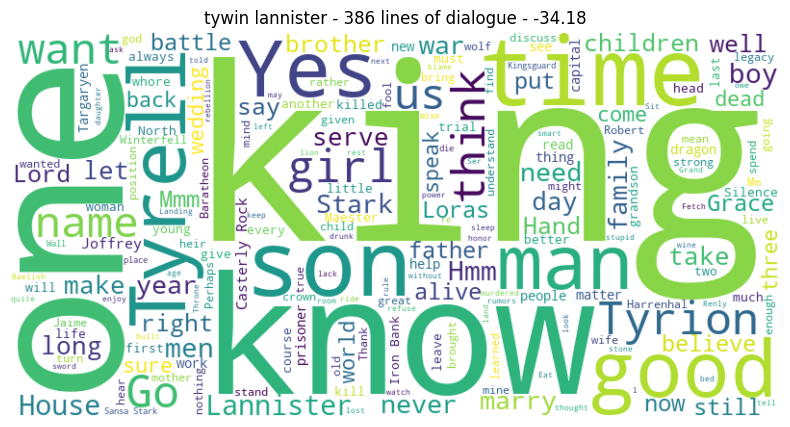

In [50]:
for speaker, sentiment in zip(top3_final_sentiment['speaker'], top3_final_sentiment['final_accumulative_sentiment']):
    create_wordcloud(speaker, sentiment)

for speaker, sentiment in zip(bottom3_final_sentiment['speaker'], bottom3_final_sentiment['final_accumulative_sentiment']):
    create_wordcloud(speaker, sentiment)


In [53]:
dialogues.loc[dialogues['mapped']=='jon snow']

,Text,Speaker,Episode,Season,Show,sentiment_score,sentiment_label,mapped,bracket,accumulative_sentiment,average_sentiment
10,Go on. Father’s watching.,JON,e1-Winter is Coming,season-01,Game-of-Thrones,3.178272,POSITIVE,jon snow,NaN,3.178272,1.000000
11,And your mother.,JON,e1-Winter is Coming,season-01,Game-of-Thrones,2.477227,POSITIVE,jon snow,NaN,5.655499,1.000000
13,"Don’t think too much, Bran.",JON,e1-Winter is Coming,season-01,Game-of-Thrones,4.272757,NEGATIVE,jon snow,NaN,1.382742,0.333333
21,Don’t look away.,JON (to BRAN),e1-Winter is Coming,season-01,Game-of-Thrones,3.833535,POSITIVE,jon snow,to BRAN,5.216277,0.500000
22,Father will know if you do.,JON,e1-Winter is Coming,season-01,Game-of-Thrones,3.365271,POSITIVE,jon snow,NaN,8.581547,0.600000
...,...,...,...,...,...,...,...,...,...,...,...
20727,"You can come see me, you know, at Castle Black.",JON,e6,season-08,Game-of-Thrones,3.797649,POSITIVE,jon snow,NaN,-196.745849,-0.093805
20729,You think anyone will dare tell you women are...,JON,e6,season-08,Game-of-Thrones,2.874924,NEGATIVE,jon snow,NaN,-199.620773,-0.094607
20733,(chuckles) I don't know.,JON,e6,season-08,Game-of-Thrones,2.659033,NEGATIVE,jon snow,NaN,-202.279806,-0.095406
20735,You have your Needle?,JON,e6,season-08,Game-of-Thrones,1.881338,NEGATIVE,jon snow,NaN,-204.161144,-0.096205
